# Проект "Дашборд для Яндекс.Дзен"

<h1>Содержание:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Выгрузка-базы-данных" data-toc-modified-id="Выгрузка-базы-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Выгрузка базы данных</a></span></li><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Общая информация</a></span></li></ul></div>

## Выгрузка базы данных

Импортируем необбходимые библиотеки

In [2]:
import pandas as pd
from sqlalchemy import create_engine

Загрузим базу данных и сохраним ее в датафрейм `dash_visits`

In [3]:
db_config = {'user': 'praktikum...t', # имя пользователя
            'pwd': '.....', # пароль
            'host': '......mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

query = '''
        SELECT * FROM dash_visits
        '''
dash_visits = pd.io.sql.read_sql(query, con = engine)

Выведим полученный результат (5 строк)

In [4]:
dash_visits.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


Сохраним базу данных в файл csv с одноименным названием

In [5]:
dash_visits.to_csv(r'C:....\dash_visits.csv', index=False)

## Общая информация

Выведим общую информацию по датафрейму

In [6]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


Проверим на дубликаты

In [7]:
dash_visits.duplicated().sum()

0

Выведим распределение событий по времени

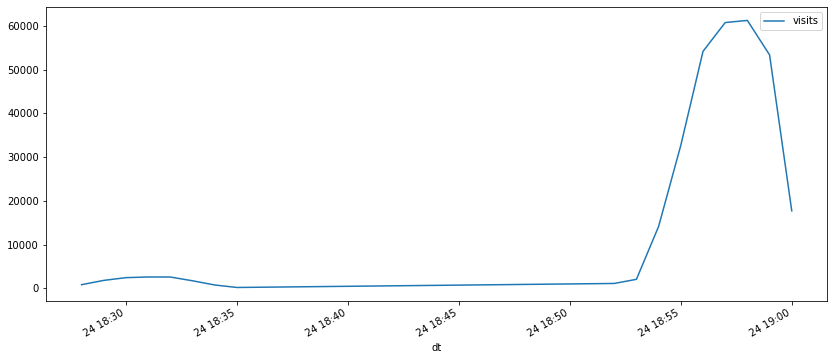

In [33]:
dash_visits.groupby('dt')['visits'].sum().reset_index().plot.line(x='dt', y='visits', figsize=(14, 6));

Видим, что основные события происходят в промежутке времени между 18:53 по 18:58

Выведим количество событий в временном интервале между "2019-09-24 18:35:00" и "2019-09-24 18:52:00"

In [38]:
dash_visits.query('dt > "2019-09-24 18:35:00" and dt < "2019-09-24 18:52:00"')['visits'].sum()

0

Событий в проверяемом промежутке времени 0